# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [57]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [58]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [59]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [60]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## project_grade_category cleaning

In [61]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)

In [62]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [63]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data["project_grade_category"] = project_grade_category

## 1.1 Sorted by time

In [64]:
#https://stats.stackexchange.com/questions/341312/train-test-split-with-time-and-person-indexed-data
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_subject_categories  \
55660           CA 2016-04-27 00:27:36             Math & Science   
76127           UT 2016-04-27 00:31:25              Special Needs   

                 project_subject_subcategories  \
55660  Applied Sciences, Health & Life Science   
76127                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      project_grade_category  
55660          Grades_PreK-2  
76127             Grades_3-5

## 1.2 Adding resource data in dataframe

In [65]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [66]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [67]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_subject_categories  \
0           CA 2016-04-27 00:27:36             Math & Science   
1           UT 2016-04-27 00:31:25              Special Needs   

             project_subject_subcategories  \
0  Applied Sciences, Health & Life Science   
1                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  project_grade_category   price  quantity  
0          Grades_PreK-2  725.05         4  
1             Grades_3-5  213.03         8

In [68]:
project_data = project_data.sample(n=10000)
#project_data=project_data.tail(1000)
#project_data.shape

In [69]:
project_data.shape

(10000, 19)

## 1.3 preprocessing of `project_subject_categories`

In [70]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.4 preprocessing of `project_subject_subcategories`

In [71]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [72]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'price', 'quantity', 'clean_categories',
       'clean_subcategories'],
      dtype='object')

## 1.3 Text preprocessing

In [73]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [74]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
15050      181436  p208489  7a74a9e0e61f2e9e0614fe18277c98d6           Mrs.   
43985       10615  p116649  037fafd005e3e4d26c2e0d13890c0c53           Mrs.   

      school_state                Date  \
15050           TX 2016-07-16 11:44:07   
43985           LA 2016-09-04 22:47:56   

                                  project_title  \
15050  Engaging Preschoolers to READ and WRITE!   
43985      Hooray! We Love to Read Great Books!   

                                         project_essay_1  \
15050  Welcome to my class which is full of 3, 4 and ...   
43985  I teach in a Title One school in Baton Rouge, ...   

                                         project_essay_2 project_essay_3  \
15050  By providing inviting areas for Reading and Wr...             NaN   
43985  My students struggle with reading and comprehe...             NaN   

      project_essay_4                           project_resource_summary  \
15050             NaN  My students need an area rug, seating area for...   
43985             NaN  My students need a classroom library of intere...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
15050                                             0                    1   
43985                                             0                    1   

      project_grade_category    price  quantity  \
15050          Grades_PreK-2  1095.99         6   
43985          Grades_PreK-2   246.94        83   

                     clean_categories              clean_subcategories  \
15050  Literacy_Language SpecialNeeds  Literature_Writing SpecialNeeds   
43985               Literacy_Language                         Literacy   

                                                   essay  
15050  Welcome to my class which is full of 3, 4 and ...  
43985  I teach in a Title One school in Baton Rouge, ...

In [75]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [76]:
'''# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)'''

'# printing some random reviews\nprint(project_data[\'essay\'].values[0])\nprint("="*50)\nprint(project_data[\'essay\'].values[150])\nprint("="*50)\nprint(project_data[\'essay\'].values[1000])\nprint("="*50)\nprint(project_data[\'essay\'].values[20000])\nprint("="*50)\nprint(project_data[\'essay\'].values[99999])\nprint("="*50)'

In [77]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [78]:
'''sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)'''

'sent = decontracted(project_data[\'essay\'].values[20000])\nprint(sent)\nprint("="*50)'

In [79]:
'''# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)'''

'# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/\nsent = sent.replace(\'\\r\', \' \')\nsent = sent.replace(\'\\"\', \' \')\nsent = sent.replace(\'\\n\', \' \')\nprint(sent)'

In [80]:
'''#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)'''

"#remove spacial character: https://stackoverflow.com/a/5843547/4084039\nsent = re.sub('[^A-Za-z0-9]+', ' ', sent)\nprint(sent)"

In [81]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 1.3.1Preprocess of Preprocessing of `essay`

In [82]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████| 10000/10000 [00:06<00:00, 1478.99it/s]


In [83]:
# after preprocesing
#preprocessed_essays[10:]

In [84]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

###<h2><font color='red'> 1.3.2Preprocessing of `project_title`</font></h2>

In [85]:
# similarly you can preprocess the titles also

In [86]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 32049.44it/s]


In [87]:
# after preprocesing
#preprocessed_project_title[1000]

In [88]:
#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727
project_data['preprocessed_project_title'] = preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

In [89]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
15050      181436  p208489  7a74a9e0e61f2e9e0614fe18277c98d6           Mrs.   
43985       10615  p116649  037fafd005e3e4d26c2e0d13890c0c53           Mrs.   

      school_state                Date  \
15050           TX 2016-07-16 11:44:07   
43985           LA 2016-09-04 22:47:56   

                                         project_essay_1  \
15050  Welcome to my class which is full of 3, 4 and ...   
43985  I teach in a Title One school in Baton Rouge, ...   

                                         project_essay_2 project_essay_3  \
15050  By providing inviting areas for Reading and Wr...             NaN   
43985  My students struggle with reading and comprehe...             NaN   

      project_essay_4                           project_resource_summary  \
15050             NaN  My students need an area rug, seating area for...   
43985             NaN  My students need a classroom library of intere...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
15050                                             0                    1   
43985                                             0                    1   

      project_grade_category    price  quantity  \
15050          Grades_PreK-2  1095.99         6   
43985          Grades_PreK-2   246.94        83   

                     clean_categories              clean_subcategories  \
15050  Literacy_Language SpecialNeeds  Literature_Writing SpecialNeeds   
43985               Literacy_Language                         Literacy   

                                     preprocessed_essays  \
15050  welcome class full 3 4 5 year old energetic ch...   
43985  i teach title one school baton rouge la 100 st...   

             preprocessed_project_title  
15050  engaging preschoolers read write  
43985   hooray we love read great books

In [90]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15050 to 86197
Data columns (total 20 columns):
Unnamed: 0                                      10000 non-null int64
id                                              10000 non-null object
teacher_id                                      10000 non-null object
teacher_prefix                                  10000 non-null object
school_state                                    10000 non-null object
Date                                            10000 non-null datetime64[ns]
project_essay_1                                 10000 non-null object
project_essay_2                                 10000 non-null object
project_essay_3                                 350 non-null object
project_essay_4                                 350 non-null object
project_resource_summary                        10000 non-null object
teacher_number_of_previously_posted_projects    10000 non-null int64
project_is_approved                          

## 1.5 Preparing data for models

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>Clustering </h1>

 **Since i score best AUC value in TFIDF vectorizer in KNN assignment . i will consider it as the data matrix for this assignment.**

In [91]:

#replace NAN to space https ://stackoverflow.com/questions/49259305/raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or?rq=1
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')

In [92]:
y=project_data['project_is_approved']
y.shape

(10000,)

In [93]:
project_data=project_data.drop(['project_is_approved'], axis=1)

In [94]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_grade_category', 'price', 'quantity', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title'],
      dtype='object')

## 2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### 2.2.1 encoding categorical features

In [95]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [96]:
#one hot encoding for clean_categories
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
x_train_categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_categories_one_hot.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'Health_Sports', 'SpecialNeeds', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (10000, 9)


In [97]:
#one hot encoding for clean_subcategories
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
x_train_subcategories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_subcategories_one_hot.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (10000, 30)


In [98]:
#one hot encoding for school_state
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
    
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
x_train_school_state_one_hot = vectorizer.fit_transform(project_data['school_state'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_school_state_one_hot.shape)


['VT', 'WY', 'ND', 'NH', 'NE', 'RI', 'MT', 'SD', 'DE', 'AK', 'NM', 'ME', 'DC', 'WV', 'KS', 'IA', 'HI', 'ID', 'CO', 'AR', 'OR', 'KY', 'MN', 'MS', 'NV', 'MD', 'AL', 'UT', 'TN', 'VA', 'WI', 'CT', 'NJ', 'OH', 'MA', 'AZ', 'LA', 'WA', 'IN', 'OK', 'MO', 'MI', 'PA', 'SC', 'GA', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encodig  (10000, 51)


In [99]:
#one hot encoding for project_grade_category
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
    
    
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
x_train_grade_category_one_hot = vectorizer.fit_transform(project_data['project_grade_category'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_grade_category_one_hot.shape)


['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix after one hot encodig  (10000, 4)


In [100]:
#one hot encoding for prefix_category
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())
    
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))



#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
x_train_prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values)

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_prefix_one_hot.shape)


['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (10000, 5)


### 2.2.2 encoding numerical features</font>

In [101]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
15050      181436  p208489  7a74a9e0e61f2e9e0614fe18277c98d6           Mrs.   
43985       10615  p116649  037fafd005e3e4d26c2e0d13890c0c53           Mrs.   

      school_state                Date  \
15050           TX 2016-07-16 11:44:07   
43985           LA 2016-09-04 22:47:56   

                                         project_essay_1  \
15050  Welcome to my class which is full of 3, 4 and ...   
43985  I teach in a Title One school in Baton Rouge, ...   

                                         project_essay_2 project_essay_3  \
15050  By providing inviting areas for Reading and Wr...             NaN   
43985  My students struggle with reading and comprehe...             NaN   

      project_essay_4                           project_resource_summary  \
15050             NaN  My students need an area rug, seating area for...   
43985             NaN  My students need a classroom library of intere...   

       teacher_number_of_previously_posted_projects project_grade_category  \
15050                                             0          Grades_PreK-2   
43985                                             0          Grades_PreK-2   

         price  quantity                clean_categories  \
15050  1095.99         6  Literacy_Language SpecialNeeds   
43985   246.94        83               Literacy_Language   

                   clean_subcategories  \
15050  Literature_Writing SpecialNeeds   
43985                         Literacy   

                                     preprocessed_essays  \
15050  welcome class full 3 4 5 year old energetic ch...   
43985  i teach title one school baton rouge la 100 st...   

             preprocessed_project_title  
15050  engaging preschoolers read write  
43985   hooray we love read great books

In [102]:
#price standardization of x_train data
#--------------------------------------
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_train_price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.03574, Standard deviation : 365.2585518701682


### 2.2.3 merge numerical and categorical data

In [103]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe = hstack((x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_school_state_one_hot, x_train_grade_category_one_hot, x_train_prefix_one_hot, x_train_price_standardized))

print(x_train_ohe.shape)


(10000, 100)


In [104]:
print(x_train_categories_one_hot.shape)
print(x_train_subcategories_one_hot.shape)
print(x_train_school_state_one_hot.shape)
print(x_train_grade_category_one_hot.shape)
print(x_train_prefix_one_hot.shape)
print(x_train_price_standardized.shape)

(10000, 9)
(10000, 30)
(10000, 51)
(10000, 4)
(10000, 5)
(10000, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [105]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

##<h2>2.3 Applying Clustering on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.3.2 Applying Clustering on TFIDF, <font color='red'> SET 2</font>

#### vectorize the essay  and title data,<font color='red'> SET 2</font>

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10,  ngram_range=(1,4))
vectorizer_tfidf.fit(project_data['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_essays = vectorizer_tfidf.transform(project_data['preprocessed_essays'].values)


print("Shape of matrix after one hot encodig ",x_train_tfidf_essays.shape)




Shape of matrix after one hot encodig  (10000, 30772)


In [107]:

#TFIDF Vectorizer on `project_title`

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10,  ngram_range=(1,4))
vectorizer_tfidf.fit(project_data['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_title = vectorizer_tfidf.transform(project_data['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_title.shape)



Shape of matrix after one hot encodig  (10000, 914)


#### merge all sparse data,<font color='red'> SET 2</font>

In [108]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf = hstack((x_train_ohe, x_train_tfidf_essays, x_train_tfidf_title)).tocsr()

print(x_train_tfidf.shape)



(10000, 31786)


In [109]:
type(x_train_tfidf)

scipy.sparse.csr.csr_matrix

#### select best top 5000 feature ,<font color='red'> SET 2</font>

In [154]:

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
#https://stackoverflow.com/questions/49300193/feature-selection-f-classif-scikit-learn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif

x_train_tfidf_5000 = SelectKBest(f_classif, k=5000).fit_transform(x_train_tfidf, y)

print(x_train_tfidf_5000.shape)


(10000, 5000)


In [155]:
type(x_train_tfidf_5000)

scipy.sparse.csr.csr_matrix

## wordcloud function

In [ ]:
from wordcloud import WordCloud

def getCorupusDict(essay_hot_info, y_pred):
    one_hot_featr, one_hot_enc = essay_hot_info
    one_hot_enc_cols = one_hot_enc.shape[1]
    corpus_dict = {}
    i = 0
    for each_x in tqdm(y_pred):
        if each_x not in corpus_dict: corpus_dict[each_x] = ''
        for j in range(one_hot_enc_cols):
            if one_hot_enc[i][j] >= 0.5:
                corpus_dict[each_x] = "%s %s"%(corpus_dict[each_x], one_hot_featr[j].strip())
        i += 1
    
    return corpus_dict

def plotWordCloud(word_corpus, i, algo_title):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    collocations = False,
                    min_font_size = 10).generate(word_corpus) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title('The word cloud with essay text for cluster no. %s for algorithm- %s'%(i, algo_title))
    #plt.tight_layout(pad = 0) 

    plt.show() 

### K-means

#### using elbo method optimal k value

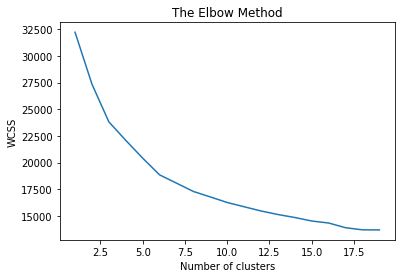

In [112]:
#https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_jobs=-1)
    kmeans.fit(x_train_tfidf_5000)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [185]:
kmean_clusters=5

**Observation:  rate of drop in WCSS is very less at k=10 so optimal value of k is 5.**  Selecting total clusters  =5  after analysing the plot. Once selected, plotting wordcloud for each cluser.

In [115]:
kmeans = KMeans(n_clusters = kmean_clusters, init = 'k-means++', random_state = 42,n_jobs=-1).fit(x_train_tfidf_5000)

In [116]:
kmeans.labels_

array([0, 1, 3, ..., 4, 4, 4])

In [117]:
kmeans.labels_.shape[0]

10000

In [118]:
cloud_tfidf=project_data['preprocessed_essays'].values
cloud_tfidf.shape

(10000,)

In [119]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = 'Kmeans++ algorithm with tfidf vectorized'):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    
    
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [120]:
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(cloud_tfidf[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(cloud_tfidf[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(cloud_tfidf[i])
    elif kmeans.labels_[i] == 3:
        cluster4.append(cloud_tfidf[i])
    else :
        cluster5.append(cloud_tfidf[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))

No. of reviews in Cluster-1 :  840

No. of reviews in Cluster-2 :  2890

No. of reviews in Cluster-3 :  28

No. of reviews in Cluster-4 :  3646

No. of reviews in Cluster-5 :  2596


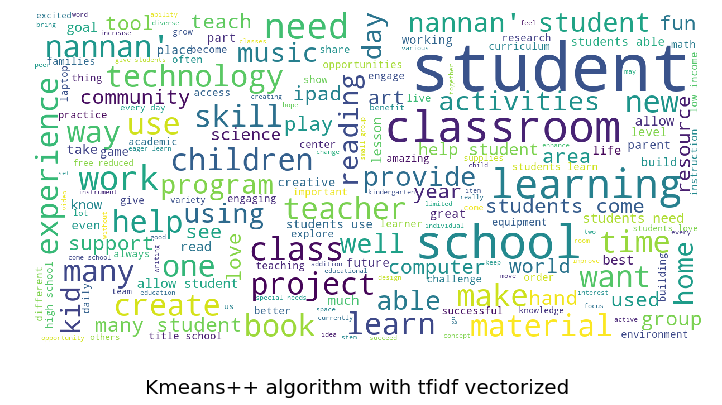

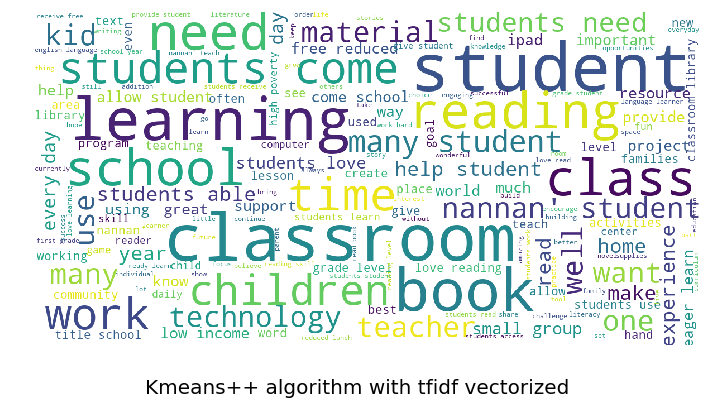

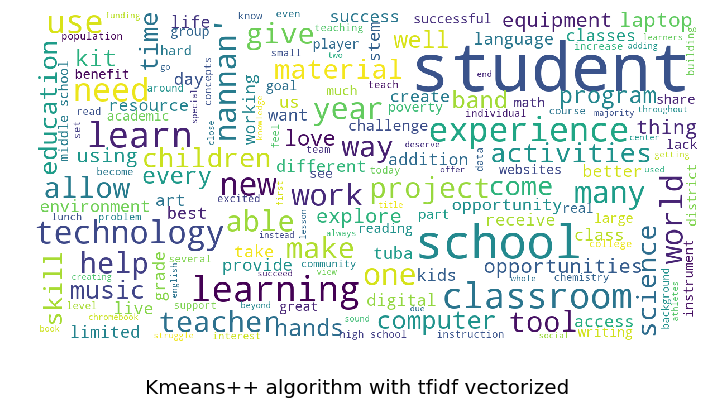

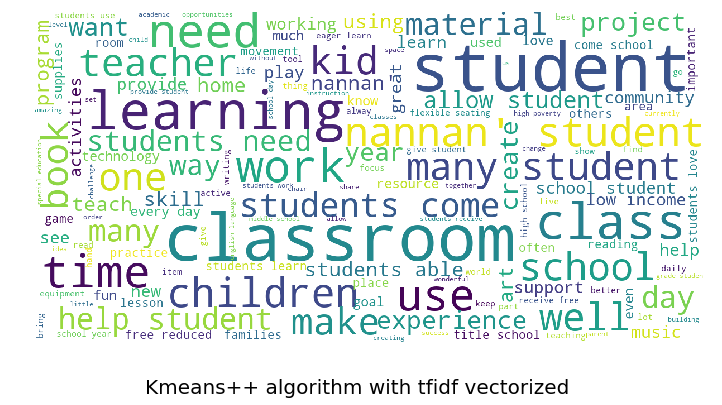

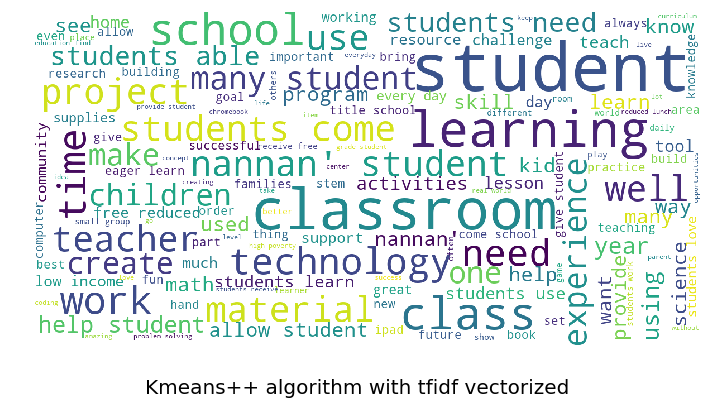

In [121]:
show_wordcloud(cluster1)
show_wordcloud(cluster2)
show_wordcloud(cluster3)
show_wordcloud(cluster4)
show_wordcloud(cluster5)

In [122]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

In [123]:
for i in range(0, len(centroids)):
    print(centroids.ix[i,:].sort_values(ascending = False)[0:10])
    print("\n")

30    1.982630
3     0.416667
4     0.367857
14    0.213095
28    0.158333
2     0.152381
13    0.152381
12    0.144048
27    0.104762
11    0.095238
Name: 0, dtype: float64


14      1.000000
4       1.000000
3       0.289965
28      0.112457
3760    0.090233
26      0.069204
13      0.066782
2       0.066782
25      0.063322
24      0.056055
Name: 1, dtype: float64


30    10.287033
3      0.464286
4      0.285714
12     0.285714
28     0.250000
14     0.214286
2      0.178571
13     0.178571
9      0.178571
27     0.178571
Name: 2, dtype: float64


4       0.265222
13      0.223533
2       0.223533
11      0.205431
28      0.146462
10      0.097093
3760    0.089262
27      0.081733
26      0.056226
25      0.052660
Name: 3, dtype: float64


3       1.000000
12      0.312018
4       0.238444
9       0.151387
28      0.142912
3760    0.093502
26      0.077427
27      0.060478
25      0.055470
13      0.050462
Name: 4, dtype: float64




### Agglomerative Clustering

In [113]:
x_train_tfidf_5000=x_train_tfidf_5000.todense()

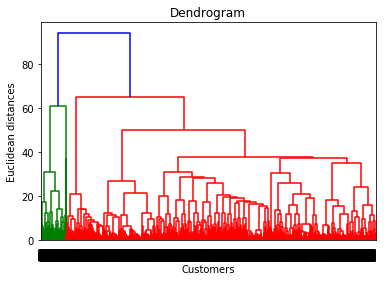

In [114]:
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
#https://discuss.analyticsvidhya.com/t/how-to-find-number-of-cluster-in-cluster-dendrogram/6472

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_train_tfidf_5000, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**from above dendrogram graph show that the optimal number of cluster is 5. horzintal line cut all longest vertical line at 5 place.**

In [180]:
clusters=5

In [124]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

# create clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=clusters, affinity = 'euclidean', linkage = 'ward').fit(x_train_tfidf_5000)
# save clusters for chart
#y_hc = hc.fit_predict(x_train_tfidf_5000)

In [125]:
type(x_train_tfidf_5000)

numpy.matrix

In [126]:
cloud_tfidf=project_data['preprocessed_essays'].values
cloud_tfidf.shape

(10000,)

In [182]:
hc.labels_.shape[0]

10000

In [130]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = 'AgglomerativeClustering with tfidf vectorized'):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    
    
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [129]:
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(hc.labels_.shape[0]):
    if hc.labels_[i] == 0:
        cluster1.append(cloud_tfidf[i])
    elif hc.labels_[i] == 1:
        cluster2.append(cloud_tfidf[i])
    elif hc.labels_[i] == 2:
        cluster3.append(cloud_tfidf[i])
    elif hc.labels_[i] == 3:
        cluster4.append(cloud_tfidf[i])
    else :
        cluster5.append(cloud_tfidf[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))

No. of reviews in Cluster-1 :  6559

No. of reviews in Cluster-2 :  30

No. of reviews in Cluster-3 :  1105

No. of reviews in Cluster-4 :  731

No. of reviews in Cluster-5 :  1575


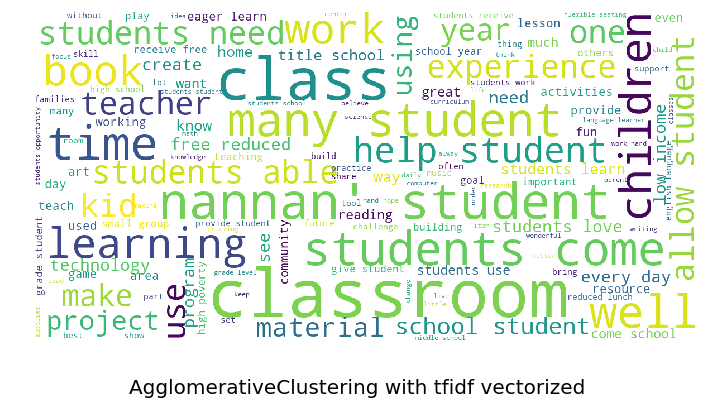

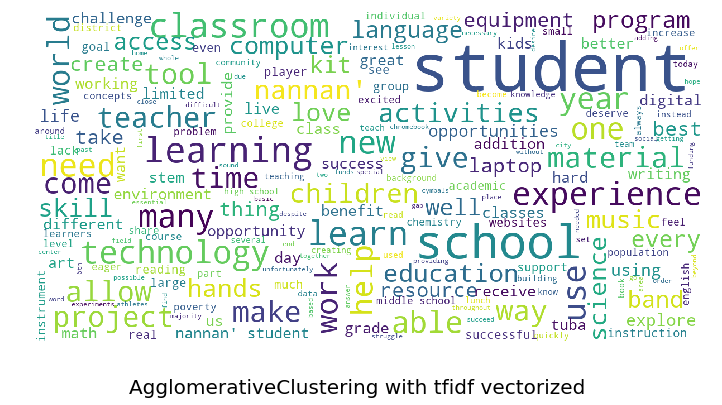

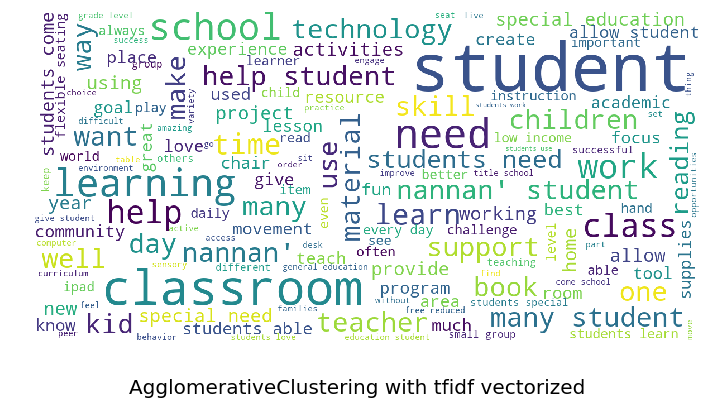

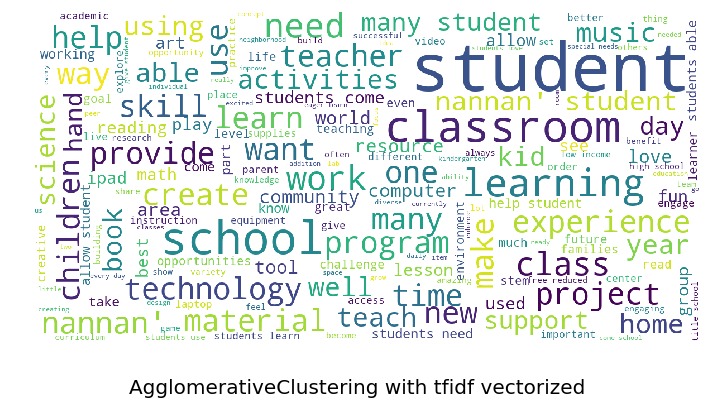

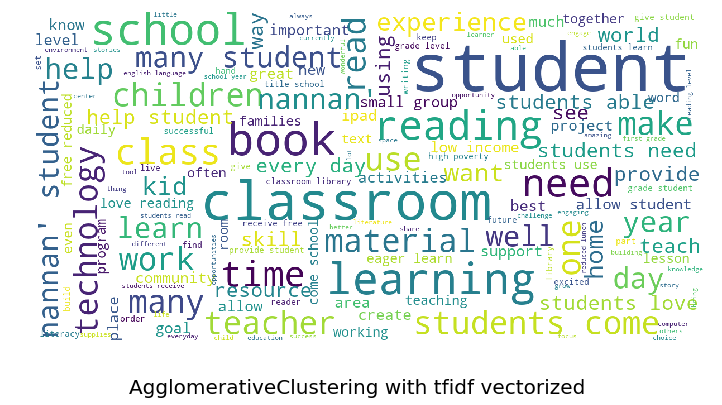

In [131]:
show_wordcloud(cluster1)
show_wordcloud(cluster2)
show_wordcloud(cluster3)
show_wordcloud(cluster4)
show_wordcloud(cluster5)

### DBSCAN Clustering

In [133]:
#!pip install pyclustering

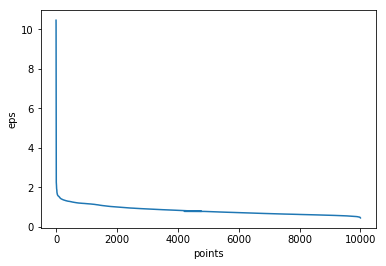

In [161]:
#https://stackoverflow.com/questions/48010276/how-to-estimate-eps-using-knn-distance-plot-in-dbscan
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.neighbors import NearestNeighbors
ns = 4
nbrs = NearestNeighbors(n_neighbors=ns).fit(x_train_tfidf_5000)
distances, indices = nbrs.kneighbors(x_train_tfidf_5000)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)
plt.xlabel('points')
plt.ylabel('eps')
plt.show()


the optimal value of eps is 2 using elbo method where x axis show the data point.

In [171]:
min_points = x_train_tfidf_5000.shape[1]

5000

In [164]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN
optimal_eps = 2
# Clustering with right epsilon
db1 = dbscan(optimal_eps, min_points, x_train_tfidf_5000)


# Clustering with  epsilon = 5
db2 = dbscan(3, min_points, x_train_tfidf_5000)


# Clustering with epsilon = 6
db3 = dbscan(4, min_points, x_train_tfidf_5000)


# Clustering with epsilon = 7
db4 = dbscan(5, min_points, x_train_tfidf_5000)

Number of clusters for MinPts = 5000 and Epsilon = 2.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 5000 and Epsilon = 3.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 5000 and Epsilon = 4.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 5000 and Epsilon = 5.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



In [165]:
cloud_tfidf=project_data['preprocessed_essays'].values
cloud_tfidf.shape

(10000,)

In [177]:
db1.labels_

array([-1,  0, -1, ...,  0,  0,  0], dtype=int64)

In [178]:
DBSCAN_cluster=2

In [167]:
#This function is used to plot a word cloud given a text corpus.
def plot_word_clouds_db(review_corpus,cluster_name):
    wordcloud = WordCloud(width=800, height=450, margin=2, max_font_size=50, scale=1, max_words=100, 
                          random_state=42, background_color='black', repeat=False).generate(str(review_corpus))
    plt.figure(figsize=(16,9))
    if cluster_name == -1:
        plt.title("Word Cloud for Cluster {} (Noisy Cluster)".format(cluster_name))
    else:
        plt.title("Word Cloud for Cluster {} (Dense Cluster)".format(cluster_name+1))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [168]:

def draw_word_clouds_clusters_db(model, X_corpus):
    reviews=list(X_corpus)
    labels=model.labels_ #Labels of each data point
    clusters_list=list(set(labels)) #List of all unique clusters
    no_of_clusters = len(set(labels)) #Total number of clusters obtained.
    
    for cluster_name in clusters_list:
        cluster_reviews = []
        review_count = 1      
        for i in range(labels.shape[0]):
            if (labels[i] == cluster_name):
                cluster_reviews.append(reviews[i])
        plot_word_clouds_db(cluster_reviews,cluster_name)

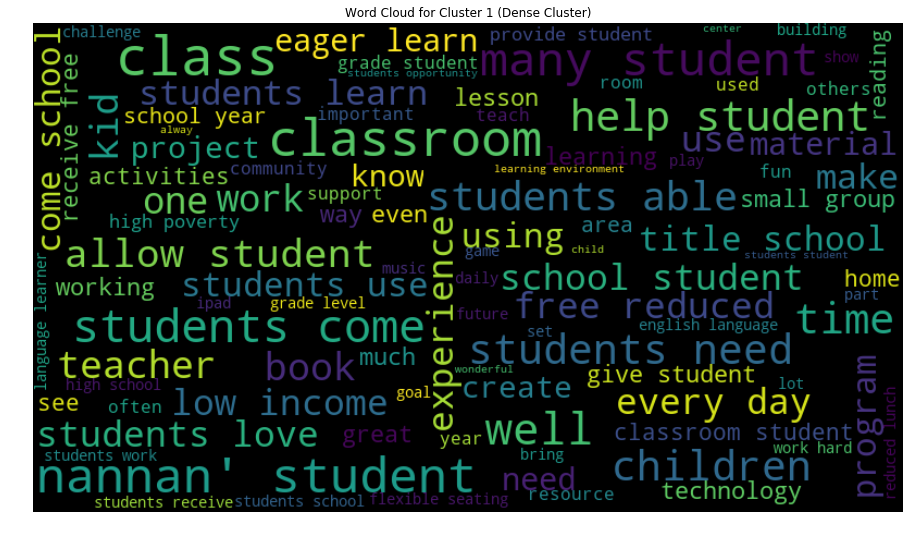

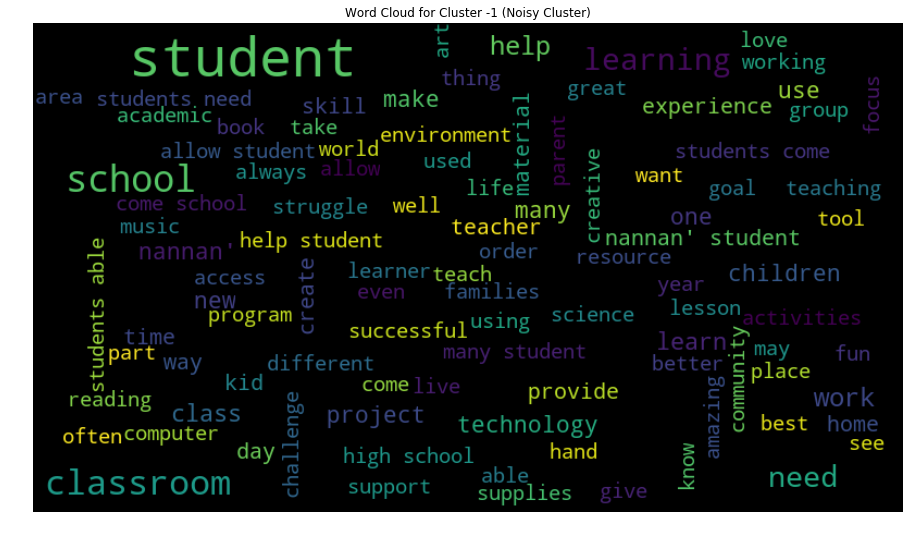

In [169]:
draw_word_clouds_clusters_db(db1, cloud_tfidf)

# Conclusion

### KMean clustering

In [186]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Hyperparameyter plot" ,"kmean initalization", "cluster"]
x.add_row(["elbow mrthod" ,"KMean++", kmean_clusters])
print(x)

+----------------------+---------------------+---------+
| Hyperparameyter plot | kmean initalization | cluster |
+----------------------+---------------------+---------+
|     elbow mrthod     |       KMean++       |    5    |
+----------------------+---------------------+---------+


### Agglomerative

In [183]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Hyperparameter plot", "cluster"]
x.add_row(["Dendrogram", clusters])
print(x)

+---------------------+---------+
| Hyperparameter plot | cluster |
+---------------------+---------+
|      Dendrogram     |    5    |
+---------------------+---------+


### DBSCAN Clustering

In [187]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Hyperparameyter plot" ,"Epsilon", "cluster"]
x.add_row(["elbow mrthod" ,optimal_eps, DBSCAN_cluster])
print(x)

+----------------------+---------+---------+
| Hyperparameyter plot | Epsilon | cluster |
+----------------------+---------+---------+
|     elbow mrthod     |    2    |    2    |
+----------------------+---------+---------+
